In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn import metrics

In [0]:
df=pd.read_csv("used_cars_kmeans.csv")

In [0]:
df=df[['price', 'year', 'odometer', 'kelas_label']]

Untuk melihat sebaran kelas datanya.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


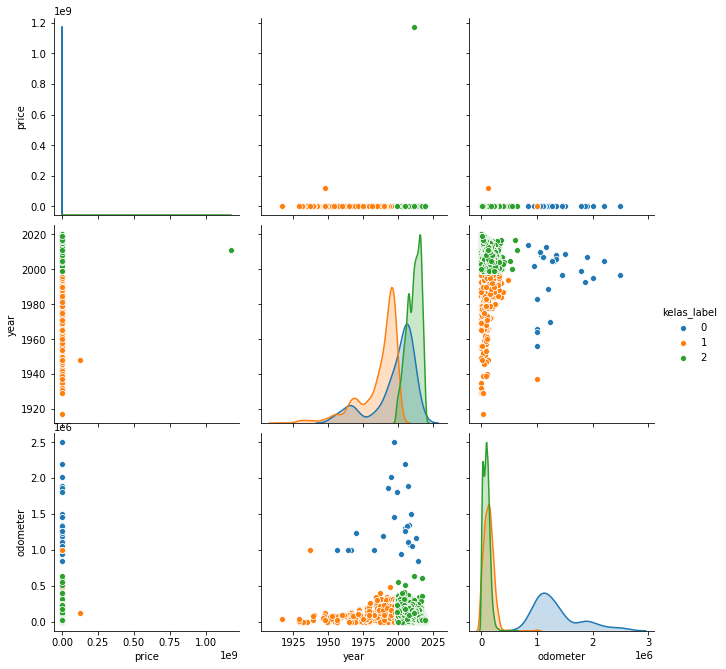

In [76]:
sns.pairplot(df, hue="kelas_label", size=3)

In [0]:
X = df[['price', 'year', 'odometer']]
Y = df['kelas_label']

Data yang kosong (nan) diisi dengan rata rata.

In [0]:
X = X.fillna(X.mean())

Pembagian data train dan data testnya di bagi menjadi 70% data train dan 30% data test.

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 123)

Lalu dilakukan scalling data agar memiliki range data yang sama.

In [0]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [81]:
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
Y_pred = classifier.predict(X_test)

In [83]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(Y_test, Y_pred))  

[[  10    0    0]
 [   1  287    3]
 [   0    0 5700]]


In [87]:
print("Accuracy:",(metrics.accuracy_score(Y_test, Y_pred))*100,"%")

Accuracy: 99.9333444425929 %


In [85]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.99      0.99       291
           2       1.00      1.00      1.00      5700

    accuracy                           1.00      6001
   macro avg       0.97      1.00      0.98      6001
weighted avg       1.00      1.00      1.00      6001

